# Колико Земаља трошимо?
У овом одељку бавићемо се екологијом, тачније утицајем човека на природну средину. Истраживања показују да људи готово дупло брже троже биокапацитете планете Земље него што она успева да их обнови. Укупна потреба људи, заједнице, активности или државе за природним ресурсима за производњу хране и апсорбцију произведеног отпада често се назива *еколошким отиском* (енгл. *ecological footprint*). Еколошки отисак се изражава у *глобалним хектарима* (gha) по становнику, тј. површином плодне земље, шума и воде потребном за задовољење потреба. Ако знамо да је биокапацитет планете Земље тренутно око 1.7 gha по становнику (и да константно опада), можемо да израчунамо __[колико планета "троши" свака држава](https://www.overshootday.org/how-many-earths-or-countries-do-we-need/)__. Тако би нам, на пример, било потребно чак пет Земаља када бисмо сви живели као грађани САД. Интензитет трошења природних ресурса може да се изрази и у потребним државама, па је тако Јапан земља која има највећи несклад између еколошких потреба и могућности јер је њеним грађанима, уз садашњу потрошњу биокапацитета, заправо потребно готово осам Јапана. 
<BR>
## Пример података о еколошком отиску
У овој вежби ће бити употребљен скуп бесплатних отворених података о еколошком отиску __[**National Footprint and Biocapacity Accounts 2021 Public Data Package**](https://www.footprintnetwork.org/licenses/public-data-package-free/)__ think tank институције *Global Footprint Network*. Think tank организације су независне институције које се баве истраживањем политика и политичког деловања и имају за циљ да образују или посаветују креаторе политика и јавност кроз разноврсне канале комуникације.
<BR><BR>
Као што је уобичајено, најпре ћемо увести табелу са подацима и приказати основне информације о њеном садржају.

In [1]:
import pandas as pd

otisak = pd.read_csv('podaci/NFA 2021.csv') 
otisak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        184 non-null    object 
 1   Data Quality                   184 non-null    object 
 2   SDGi                           160 non-null    float64
 3   Life Expectancy                176 non-null    float64
 4   HDI                            184 non-null    float64
 5   GDP per cap                    169 non-null    object 
 6   Region                         184 non-null    object 
 7   Income Group                   184 non-null    object 
 8   Population (mil)               184 non-null    float64
 9   Cropland Footprint             158 non-null    float64
 10  Grazing Footprint              158 non-null    float64
 11  Forest Footprint               158 non-null    float64
 12  Carbon Footprint               158 non-null    flo

Табела се састоји од 184 реда и 24 колоне. Већина варијабли садржи податке типа `float64`, односно децималне бројеве са тзв. *пливајућим зарезом*, тј. произвољним бројем децималних места. Информација о типу података нам је веома битна да бисмо знали које анализе можемо да применимо на некој варијабли. У том смислу треба обратити пажњу да чак пет варијабли у табели има тип података `object` што највероватније указује на то да садрже вредности које су комбинација слова и бројевa. То је посебно сумњиво у слуачају варијабле *GDP per cap* која би требало да садржи бројчану вредност бруто друштвеног производа (БДП) по становнику. Стога ћемо проверити како би билиотека `pandas` третирала податке из ове колоне. Приказаћемо тип податка (функција `type`) за први запис у колони (индекс `[0]`).

In [2]:
print('Подаци у колони GDP per cap су типа', type(otisak['Income Group'][0]))

Подаци у колони GDP per cap су типа <class 'str'>


Као што се види, подаци у колони *GDP per cap* су заправо текстуалног типа, тј. дефинисани су као класа `str` (стринг). То значи да би било која алгебарска операција над њима довела до грешке. Приказаћемо првих 5 редова (записа) табеле за све колоне коју садрже податке типа `object` да бисмо лакше установили о чему је реч.

In [3]:
otisak.select_dtypes(include=object).head(5)

,Country,Data Quality,GDP per cap,Region,Income Group
0,Afghanistan,3A,$584,Middle East/Central Asia,LI
1,Albania,3A,"$4,868",Other Europe,UM
2,Algeria,2A,"$4,820",Africa,UM
3,Angola,3A,"$3,414",Africa,LM
4,Antigua and Barbuda,2B,"$13,548",Central America/Caribbean,HI


Варијабле *Country* и *Region* су очекивано стрингови, а колона *Data Quality* је интерна ознака истраживачке институције која показује каквог су квалитета прикупљени подаци, односно колико су поуздани. Међутим, преостале две колоне би у анализама могле да се посматрају као нумеричке. Вредности варијабле *GDP per cap* нису учитане као нумеричке због ознака `$` и `,`. Пре него што обавимо потребне корекције података приказаћемо јединствене вредности свих варијабли типа `object`. Искључићемо варијаблу `Country` која има превелик број нивоа, тј. јединствених вредности. 

In [4]:
koloneObj = otisak.select_dtypes(include=object)
for kolona in koloneObj:
    brVred = otisak[kolona].unique()
    if len(brVred) < 10: 
        print(otisak[kolona].name, ":", otisak[kolona].unique())

Data Quality : ['3A' '2A' '2B']
Region : ['Middle East/Central Asia' 'Other Europe' 'Africa'
 'Central America/Caribbean' 'South America' 'Asia-Pacific' 'EU-28'
 'North America']
Income Group : ['LI' 'UM' 'LM' 'HI']


Видимо да постоје три ознаке квалитета података које би евентуално могле да послуже као основа за ограничавање анализе на најпоузданије податке (3A). Варијабла *Region* нам омогућава да државе поделимо у осам група, односно региона. Na kraju, вредности у колони *Income Group* биле би много употребљивије да су означене цифрама од 1 до 4 јер је у питању ранг држава према просечним приходима њених грађана, од најнижег до највишег: *low income (LI)*, *lower medium (LM)*, *upper medium (UM)* и *high (HI)*. Текстуалне ознаке могу да послуже само као основ за категоризацију, док би рангирање ипак пружило могућност за закључиванје о разликама у изражености неког својства међу државама.  

<div class="alert alert-block alert-success">
Америчи психолог <i>Стенли Смит Стивенс</i> препоручио је поделу варијабли на основу тзв. <i>нивоа мерења</i>. Варијабле се на основу њихове "квантитативне моћи" деле на номиналне, ординалне, интервалне и размерне. <i>Номиналне варијабле</i>, као што је регион, омогућавају нам само да разликујемо ентитете међу собом. <i>Ординалне</i> или <i>ранг</i> варијабле нам омогућавају да кажемо који ентитет има више изражено неко својство, али не и за колико више. Таква варијабла је поменута категорија прихода. <i>Интервалне</i> варијабле омогућавају и да одговоримо за колико је неки ентитет бољи. На крају, <i>размерне</i> варијабле пружају могућност да одговоримо и на питање колико пута је неко својство више или мање изражено јер скале тих варијабли поседују асполутну нулу. При томе виши нивои мерења омогућавају примену напреднијих статистичких поступака.За основно разумевање статистичких анализа довољно је да корисник уме да разликује прва три нивоа. 
</div>

У колони *GDP per cap* ћемо најпре уклонити знаке `$` и `,` а потом конвертовати варијаблу из типа `object` у тип `float`. Да бисмо ефикасније обавили измену употребићемо тзв. *регуларне изразе* (енгл. __[*regular expressions*](https://docs.python.org/3/library/re.html)__) па је стога аргумент `regex` функције `replace` постављен на `True`. У угластим заградама смо навели све ознаке (`[$,]`) које желимо да заменимо празном ниском (`''`). 

In [5]:
otisak['GDP per cap'] = otisak['GDP per cap'].replace('[$,]','', regex=True)
otisak['GDP per cap'] = otisak['GDP per cap'].astype(float, errors = 'raise')

Након тога ћемо заменити вредности варијабле `Income Group` и записати их у нову варијаблу `Income Group R`.

In [6]:
otisak['Income Group R'] = otisak['Income Group'].replace({ 'LI' : 1, 'LM' : 2, 'UM' : 3, 'HI' : 4 })

Коначно, приказаћемо дистрибуцију вредности БДП уз помоћ хистограма, а дистрибуцију категорија прихода по становнику стубичастим дијаграмом. Претходно ћемо сортирати вредности ове друге варијабле по колони `Income Group R` како би се на графикону на првом месту појавио стубић који означава ниске приходе (LI), а на последњем високе (HI).

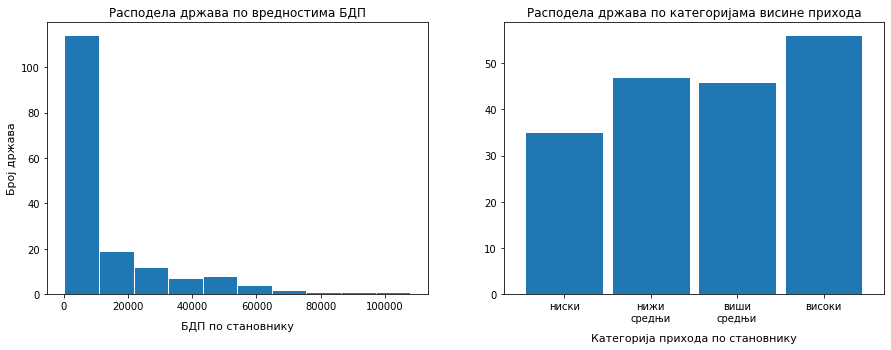

In [7]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

otisak[otisak['GDP per cap'] > 0]['GDP per cap'].plot(kind='hist', edgecolor='white', ax=ax1)
ax1.set_title("Расподела држава по вредностима БДП", fontsize=12) 
ax1.set_xlabel("БДП по становнику", labelpad=10, fontsize=11) 
ax1.set_ylabel('Број држава', fontsize=11)  

otisak.sort_values(by='Income Group R')['Income Group'].value_counts()[['LI','LM','UM','HI']].plot(kind='bar', width=0.90, edgecolor='white', ax=ax2)
ax2.set_title("Расподела држава по категоријама висине прихода", fontsize=12) 
ax2.set_xlabel("Категорија прихода по становнику", labelpad=10, fontsize=11) 
ax2.set_xticklabels(labels=['ниски','нижи\nсредњи','виши\nсредњи','високи'], rotation=0) 

plt.show()

Горњи графикони илуструју важност прецизне дефиниције и одабира варијабли којима се исказује израженост неког феномена. Подела на категорије приказана на десном графикону очигледно прикрива изузетну искошеност расподеле богатства међу земљама. Критеријуми Светске банке за сврставање у категорију земаља са високих приходима је око 12.000 долара, али тек на основу левог графикона видимо да је то уједно и категорија у којој постоји највећа варијабилност. Горња граница нјеног распона, односно десни крај издуженог "репа" дистрибуције приказане на левом графикону, готово десет пута је већа од доње. 

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Промените параметар <b>otisak['GDP per cap'] > 0</b> у горњем коду тако да на левом графикону буду приказане само земље које имају просечан БДП мањи од 12.000 долара по становнику. Да ли је дистрибуција и даље толико искошена?</div> 

На крају, погледајмо и колико планета је потребно појединачним државама. Приказаћемо дистрибуцију варијабле *Number of Earths required* и означићемо границу на подеоку 1 што је вредност која показује да држава троши онолико природних ресурса колико их и има на располагању.

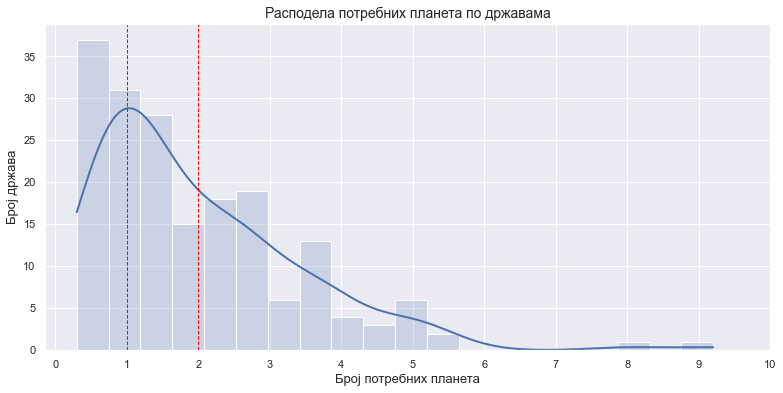

In [8]:
import seaborn as sbrn

sbrn.set_theme(style='darkgrid')
fig, ax1 = plt.subplots(figsize=(13,6))
sbrn.histplot(otisak['Number of Earths required'], ax=ax1, kde=True, bins=20, alpha=0.2)
ax1.get_lines()[0].set_linewidth(2)
ax1.set_title('Расподела потребних планета по државама', fontsize=14)
ax1.set_xlabel('Број потребних планета', fontsize=13)
ax1.set_ylabel('Број држава', fontsize=13)
ax1.set_xticks(range(0, 11))
ax1.axvline(1, linestyle='--', color='green', lw=1)
ax1.axvline(2, linestyle='--', color='red', lw=1)
plt.show()

Очигледно је да већина држава има веома високе вредности еколошког отиска што значи да би нам требало чак и до 9 Земаља када бисмо сви живели као грађани ових држава. Да бисте лакше повезали површине графикона, односно површине испод приказане криве дистрибуције података, направићемо табелу учесталости различитих категорије држава и приказати њихов удео у укупном броју држава. Обратите пажњу да смо уз стубиће приказали и тзв. *криву дистирбуције вероватноћа* која нам омогућава да лакше проценимо колики је удео вредности у неком интервалу или изнад и испод неке тачке. Прецизније, ова крива нам омогућава да проценимо вероватноћу неког исхода на основу емпиријских податак које смо прикупили. 
<BR><BR>
Употребићемо функцију `select` библиотеке `numpy` којом ћемо направити нову варијаблу са ознакама категорија на основу броја потребних земаља. Уочите да смо једну дугу линију кода преломили уз помоћ обрнуте косе црте `\` (енгл. *backslash*. У резултирајућој табели учесталости смо направили колону са пропорцијама чије су вредности израчунате као однос броја држава у категорији и укупног броја држава израчунатог помоћу функције `sum()`. Вредност је заокружена на две децимале уз помоћ функције `round(2)`.

In [9]:
import numpy as np

granice = [ otisak['Number of Earths required'] < 1, 
            otisak['Number of Earths required'] == 1, 
            otisak['Number of Earths required'].between(1, 2, inclusive='neither'),
            otisak['Number of Earths required'] >=2
          ]
kategorije = ['a', 'b', 'c', 'd']
otisak.sort_values('Number of Earths required')
otisak['NER_Kat'] = np.select(granice, kategorije, default=np.nan)
tabFrek = otisak['NER_Kat'].value_counts(sort=False). \
  rename_axis('Број потребних планета').reset_index(name='Број држава'). \
  replace(['a', 'b', 'c', 'd'], ['мање од једне', 'једна', 'између једне и две', 'више од две'])
tabFrek['p'] = (tabFrek['Број држава'] / tabFrek['Број држава'].sum()).round(2) 
tabFrek

,Број потребних планета,Број држава,p
0,мање од једне,47,0.26
1,између једне и две,55,0.30
2,више од две,76,0.41
3,једна,6,0.03


Из приказане табеле јасније се види да више од 70% држава троши више природних ресурса него што их имамо на располагању. Проценат држава које се налазе између зелене и црвене граничне линије на графикону је 30%, али такође видимо да око 26% држава има релативно низак еколошки отисак и да разумно троши биокапацитете Земље.

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Линију расподеле густине вероватноћа на последњем графиокну изминили смо помоћу функцијe <b>get_lines()</b>. Претражите __[функције и својства](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html)__ објекта <b>Line2D</b> и покушајте самостално да измените боју и изглед линије.</div> 

На крају, пошто ћемо исте податке користити и у наредним анализама, смнимићемо их у нову csv датотеку да не бисмо поново морали да правимо измене које смо начинили у овој лекцији. Датотеку ћемо назвати *NFA 2021 v2*.

In [10]:
otisak.to_csv('podaci/NFA 2021 v2.csv', index=False)